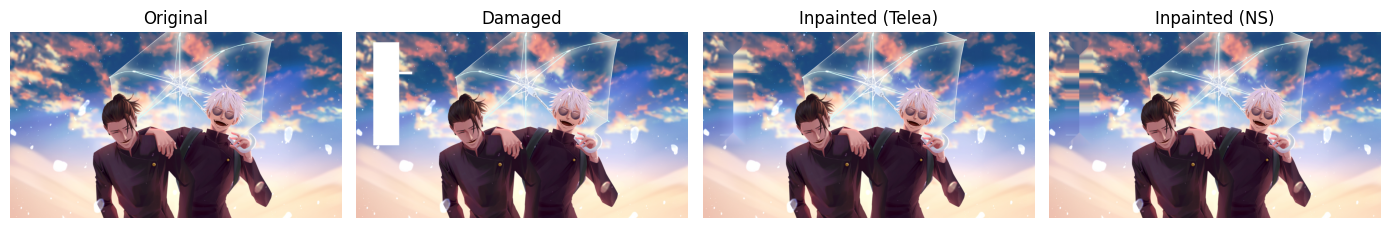

In [ ]:
# i) Image Inpainting

# Step 1: Install necessary libraries (only if not already installed)
# !pip install opencv-python-headless matplotlib

# Step 2: Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 3: Load your image directly (replace the path as needed)
img_path = "/content/satoru-gojo-suguru-3840x2160-16378.jpg"
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 4: Simulate damage by drawing larger white boxes
mask = np.zeros(image.shape[:2], np.uint8)

# Expanded first box
mask[470:500, 120:650] = 255

# Expanded second box
mask[130:1320, 200:500] = 255

# Apply damage (white patches)
damaged = image.copy()
damaged[mask == 255] = 255


# Step 5: Inpainting using OpenCV
inpainted_telea = cv2.inpaint(damaged, mask, 3, cv2.INPAINT_TELEA)
inpainted_ns = cv2.inpaint(damaged, mask, 3, cv2.INPAINT_NS)

# Step 6: Display results
plt.figure(figsize=(14, 6))
titles = ["Original", "Damaged", "Inpainted (Telea)", "Inpainted (NS)"]
images = [image, damaged, inpainted_telea, inpainted_ns]

for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

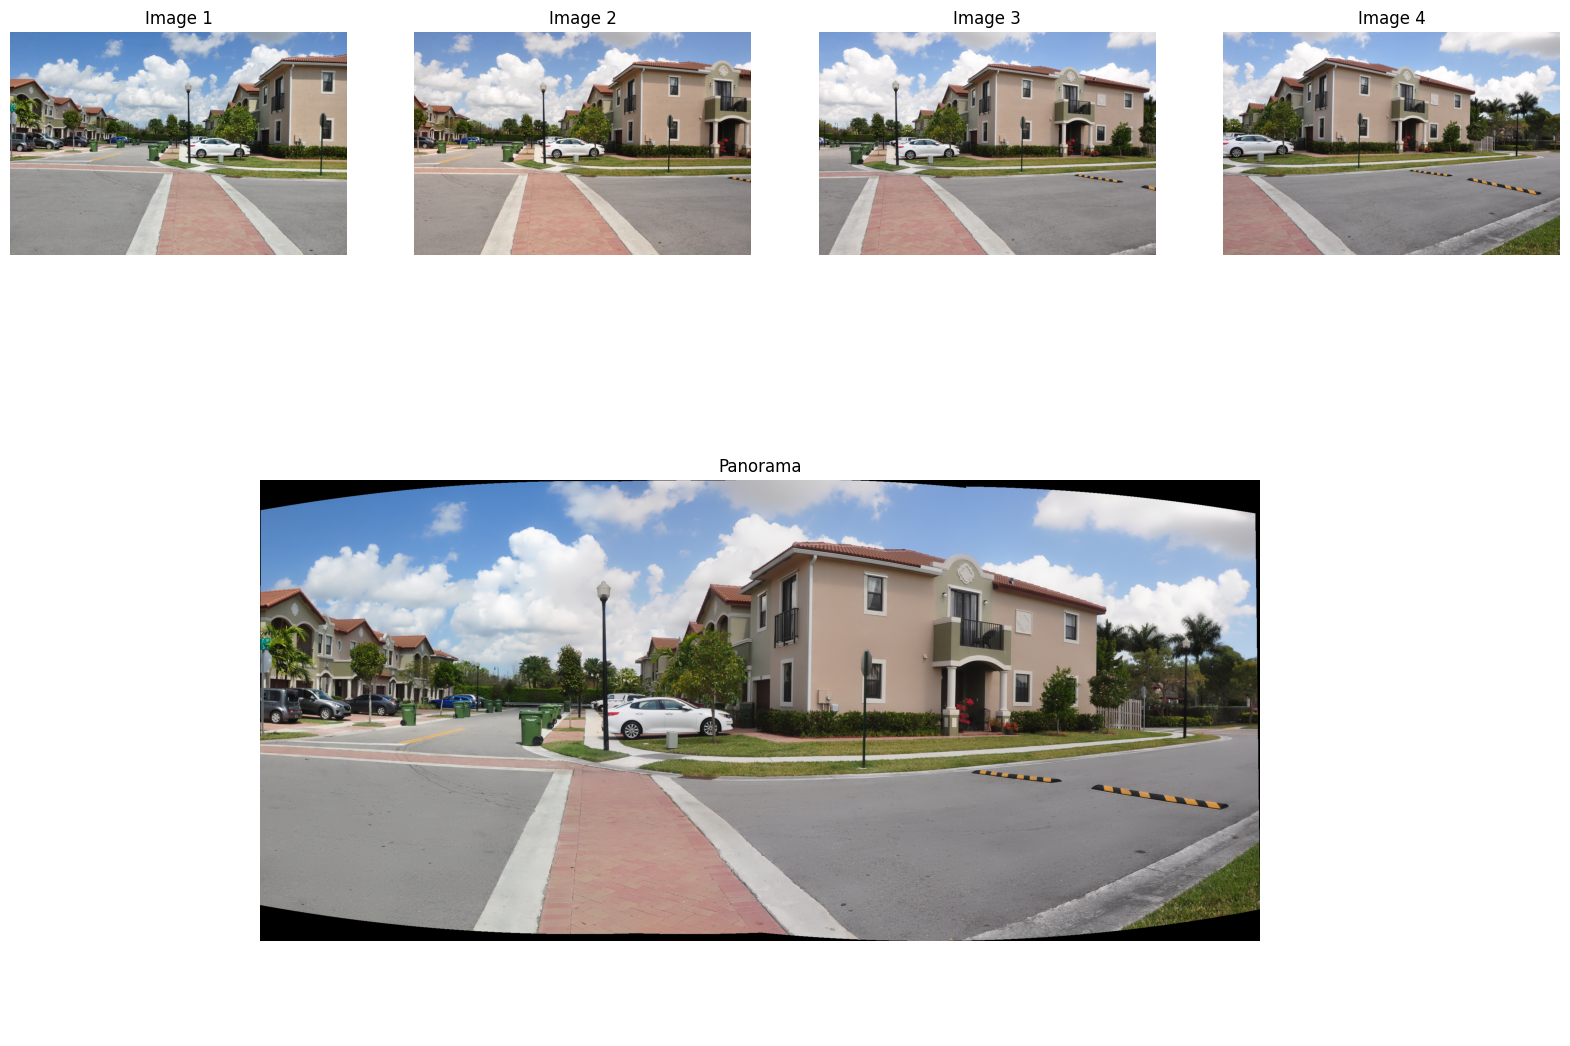

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load input images
imgs = [cv2.imread('/content/001.jpg'), cv2.imread('/content/002.jpg'), cv2.imread('/content/003.jpg'), cv2.imread('/content/004.jpg')]

# Create stitcher and stitch images
stitcher = cv2.Stitcher_create()
(status, pano) = stitcher.stitch(imgs)

# Plot the individual images and the panorama
fig, axs = plt.subplots(2, 4, figsize=(20, 15))  # 2 rows, 4 columns, adjust the figsize for larger image

# Show the individual images in the first row
for i, img in enumerate(imgs):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    axs[0, i].imshow(img_rgb)
    axs[0, i].axis('off')  # Hide axis
    axs[0, i].set_title(f"Image {i+1}")

# Show only the panorama image in the second row, occupying full width
if status == cv2.Stitcher_OK:
    pano_rgb = cv2.cvtColor(pano, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    axs[1, 0].imshow(pano_rgb)
    axs[1, 0].axis('off')  # Hide axis
    axs[1, 0].set_title("Panorama")

    # Hide extra subplots in the second row
    for j in range(1, 4):
        axs[1, j].axis('off')  # Hide the other subplots in the second row

    # Make sure the panorama image takes up most of the space
    axs[1, 0].set_position([0.25, 0.002, 0.5, 0.65])  # Adjust position to make panorama bigger

    cv2.imwrite('panorama.jpg', pano)
else:
    print("Stitching failed: ", status)

plt.show()


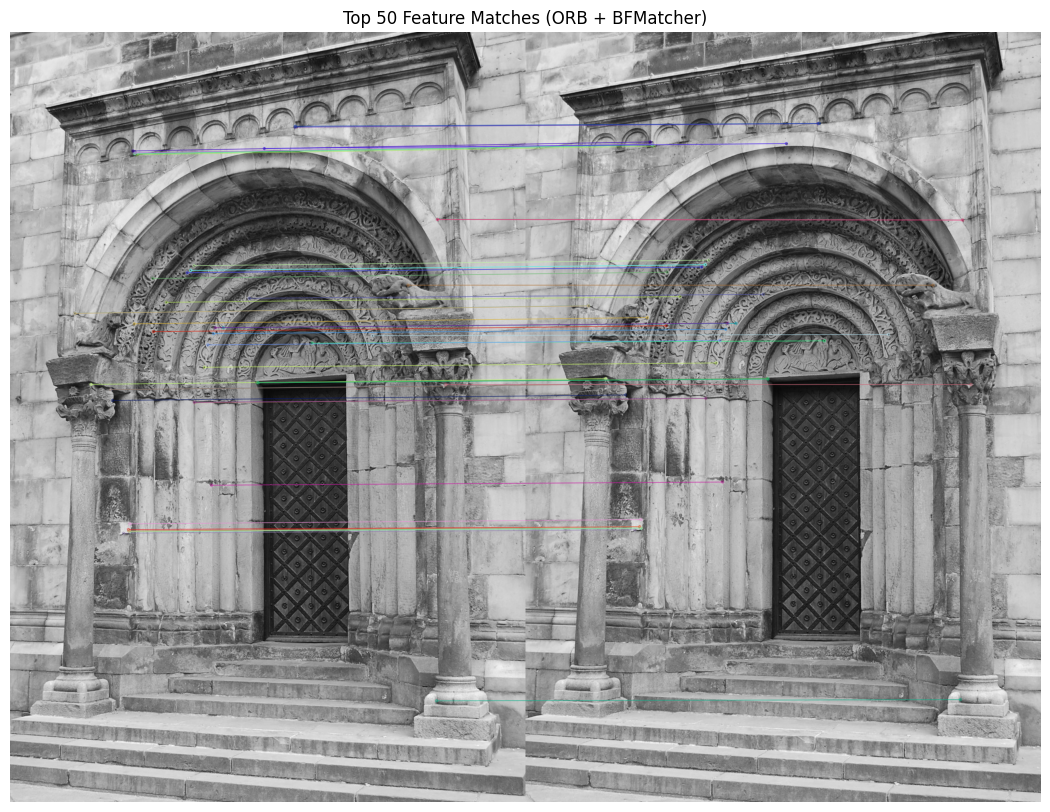

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load two grayscale images
img1 = cv2.imread('/content/DSC_0001.JPG', 0)
img2 = cv2.imread('/content/DSC_0002.JPG', 0)

# ORB feature detection
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# BFMatcher with Hamming distance
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

# Draw top 50 matches for better visualization
matched_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)

# Convert to RGB for matplotlib
matched_img_rgb = cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB)

# Plot the matched image
plt.figure(figsize=(20, 10))
plt.imshow(matched_img_rgb)
plt.title("Top 50 Feature Matches (ORB + BFMatcher)")
plt.axis('off')
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 110s 228ms/step - loss: 0.1234 - val_loss: 0.1140
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 128s 200ms/step - loss: 0.1117 - val_loss: 0.1140
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 145s 207ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 139s 201ms/step - loss: 0.1117 - val_loss: 0.1140
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 102s 217ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 94s 200ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 203ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 200ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 203ms/step - loss: 0.1122 - val_loss: 0.1140
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 200ms/step - loss: 0.1121 - val_loss: 0.1140
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Average

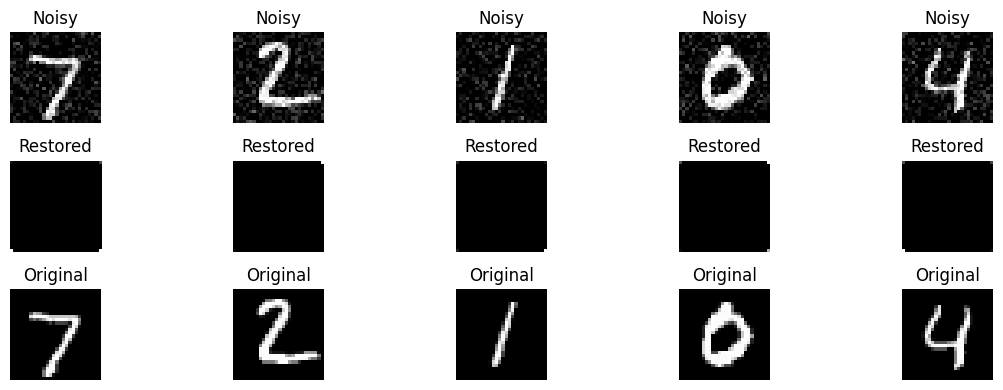

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio as psnr

# Step 1: Load & Preprocess Data
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.

x_train = np.expand_dims(x_train, axis=-1)
x_test  = np.expand_dims(x_test, axis=-1)

# Step 2: Simulate Degradation (Add Gaussian noise)
def degrade_images(images):
    noisy = random_noise(images, mode='gaussian', var=0.02)
    return np.clip(noisy, 0., 1.)

x_train_noisy = degrade_images(x_train)
x_test_noisy  = degrade_images(x_test)

# Step 3: Build the Autoencoder
def build_autoencoder():
    input_img = layers.Input(shape=(28, 28, 1))

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_img, decoded)
    return autoencoder

autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='mse')

# Step 4: Train the Model
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Step 5: Restore & Evaluate
restored_imgs = autoencoder.predict(x_test_noisy)

# Calculate average PSNR
avg_psnr = np.mean([psnr(x_test[i], restored_imgs[i]) for i in range(100)])
print(f"Average PSNR: {avg_psnr:.2f} dB")

# Display Results
n = 5
plt.figure(figsize=(12, 4))
for i in range(n):
    # Noisy
    plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Restored
    plt.subplot(3, n, i + 1 + n)
    plt.imshow(restored_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Restored")
    plt.axis('off')

    # Original
    plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Task 2 - Image Restoration using Autoencoder Model
# Step 1: Install necessary libraries

%pip install tensorflow==2.11  # TensorFlow version 2.11 (adjust as necessary)
%pip install opencv-python-headless  # Use opencv-python-headless for compatibility in Google Colab

# Step 2: Import necessary libraries

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

# Step 3: Load CIFAR-10 dataset and preprocess it

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values between [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert to grayscale
x_train_gray = np.mean(x_train, axis=-1, keepdims=True)  # Convert to grayscale
x_test_gray = np.mean(x_test, axis=-1, keepdims=True)  # Convert to grayscale

# Add noise and blur to the images
def add_noise(img):
    noise = np.random.normal(0, 0.1, img.shape)  # Gaussian noise
    return np.clip(img + noise, 0., 1.)

def add_blur(img):
    return cv2.GaussianBlur(img, (5, 5), 0)

# Add noise and blur to the images
x_train_noisy = np.array([add_blur(add_noise(img)) for img in x_train_gray])
x_test_noisy = np.array([add_blur(add_noise(img)) for img in x_test_gray])

# Step 4: Define the enhanced Autoencoder model with deeper architecture

def build_autoencoder():
    input_img = layers.Input(shape=(32, 32, 1))

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Dropout(0.2)(x)

    # Increase filter size and depth
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Deeper model with more features
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2DTranspose(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    x = layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_img, decoded)
    autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')

    return autoencoder

# Step 5: Build and summarize the model
autoencoder = build_autoencoder()
autoencoder.summary()

# Step 6: Train the model
autoencoder.fit(x_train_noisy, x_train_gray, epochs=100, batch_size=128, validation_data=(x_test_noisy, x_test_gray))

# Step 7: Predict restored images
restored_images = autoencoder.predict(x_test_noisy)

# Step 8: Plot original, noisy, and restored images
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_gray[i].reshape(32, 32), cmap='gray')
    ax.title.set_text('Original')

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(32, 32), cmap='gray')
    ax.title.set_text('Noisy')

    # Restored images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(restored_images[i].reshape(32, 32), cmap='gray')
    ax.title.set_text('Restored')

plt.show()

# Step 9: Calculate PSNR values
def psnr(y_true, y_pred):
    return tf.image.psnr(y_true, y_pred, max_val=1.0)

# Calculate PSNR for a few test images
psnr_values = [psnr(x_test_gray[i], restored_images[i]) for i in range(n)]

# Print PSNR values in a vertical manner
print("PSNR values:")
for value in psnr_values:
    print(value.numpy())  # Convert tensor to a NumPy array to get the value


ERROR: Could not find a version that satisfies the requirement tensorflow==2.11 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.11
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 2, 2, 256)      │       590,080 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 4, 4, 128)      │       295,040 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 8, 8, 64)       │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,367,425 (5.22 MB)

 Trainable params: 1,366,465 (5.21 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 472s 1s/step - loss: 0.0255 - val_loss: 0.0506
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 499s 1s/step - loss: 0.0146 - val_loss: 0.0182
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 507s 1s/step - loss: 0.0127 - val_loss: 0.0143
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 484s 1s/step - loss: 0.0118 - val_loss: 0.0136
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 500s 1s/step - loss: 0.0110 - val_loss: 0.0121
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 499s 1s/step - loss: 0.0106 - val_loss: 0.0118
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 483s 1s/step - loss: 0.0101 - val_loss: 0.0112
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 504s 1s/step - loss: 0.0097 - val_loss: 0.0103
Epoch 9/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 501s 1s/step - loss: 0.0095 - val_loss: 0.0102
Epoch 10/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 505s 1s/step - loss: 0.0092 - val_loss: 0.0096
Epoch 11/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 497s 1s/step - loss: 0.0090 - val_loss: 0.0090
Epoch 12/100
391/391 ━━━━━━━━━